Chapter 03

# 阿基米德估算圆周率
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码通过增大正多边形的边数，逐步计算对圆周率$\pi$的近似上界和下界，并展示它们的收敛过程。具体来说，代码从一个初始六边形开始，计算其内接与外接多边形的周长，分别作为$\pi$的下界和上界估计。随着正多边形的边数依次增大为$6, 12, 24, 48, 96$，代码利用递推公式不断更新对$\pi$的上下界估计：

- 下界公式为：
  $$
  B_n = n \cdot \sin\left(\frac{\pi}{n}\right)
  $$

- 上界公式为：
  $$
  A_n = n \cdot \tan\left(\frac{\pi}{n}\right)
  $$

然后，迭代更新上下界，以更接近$\pi$的真实值，更新公式为：

$$
A_{i+1} = \frac{2 \cdot A_i \cdot B_i}{A_i + B_i}
$$
$$
B_{i+1} = \sqrt{A_i \cdot B_i}
$$

这些公式的作用是不断缩小上界和下界之间的间隔，使其逐渐逼近$\pi$。随着正多边形边数的增加，内接和外接多边形的周长逐渐收敛到$\pi$，这一过程在图形中显示为蓝色和绿色曲线的逐渐靠近，并填充了它们之间的区域。

该图形直观展示了正多边形的边数趋向无穷大时对$\pi$的估计，反映出几何逼近法的收敛特性。这种方法体现了通过几何构造逐步逼近$\pi$的思想。

In [1]:
## 使用正多边形边数变化逐步逼近$\pi$的估计值

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n_start = 6  # 初始边数

B_6 = np.sin(np.pi / n_start) * n_start  # 初始下界
A_6 = np.tan(np.pi / n_start) * n_start  # 初始上界

In [4]:
B_array = []  # 存储$\pi$的下界估计值
A_array = []  # 存储$\pi$的上界估计值
n_array = [6, 12, 24, 48, 96]  # 边数的变化序列

In [5]:
B_i = B_6  # 初始化下界
A_i = A_6  # 初始化上界
n_i = n_start  # 初始化边数

In [6]:
for i in n_array:
    B_array.append(B_i)  # 记录当前下界
    A_array.append(A_i)  # 记录当前上界
    
    # 更新上下界
    A_i = 2 * A_i * B_i / (A_i + B_i)
    B_i = np.sqrt(A_i * B_i)

In [7]:
B_array = np.array(B_array)  # 转换为数组
A_array = np.array(A_array)  # 转换为数组
n_array = np.array(n_array)  # 转换为数组

Text(42.597222222222214, 0.5, 'Estimate of $\\pi$')

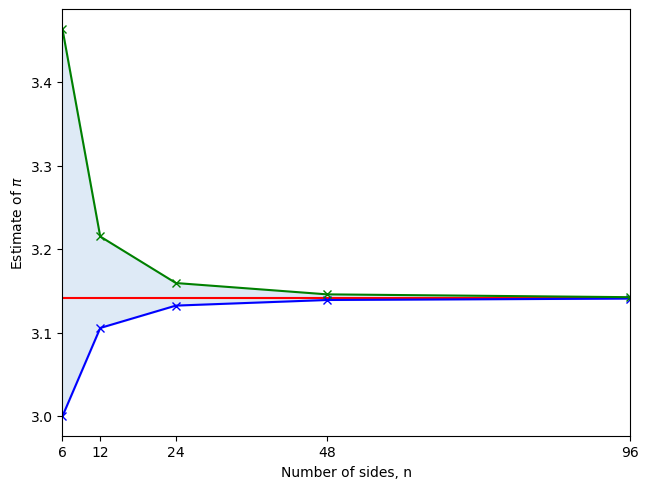

In [9]:
fig, ax = plt.subplots()

plt.axhline(y=np.pi, color='r', linestyle='-')  # 绘制$\pi$的真实值参考线
plt.plot(n_array, B_array, color='b', marker='x')  # 绘制$\pi$的下界估计值
plt.plot(n_array, A_array, color='g', marker='x')  # 绘制$\pi$的上界估计值
plt.fill_between(n_array, B_array, A_array, color='#DEEAF6')  # 填充上界与下界之间的区域
plt.tight_layout()
plt.xticks([6, 12, 24, 48, 96])  # 设置x轴刻度
plt.xlim((6, 96))  # 设置x轴范围
plt.xlabel('Number of sides, n')  # x轴标签
plt.ylabel(r'Estimate of $\pi$')  # y轴标签